## Tutorial 1. Network Science: difussion of microfinance at rural villages in India 

Created by Emanuel Flores-Bautista 2018.  All code contained in this notebook is licensed under the [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/).

This tutorial was extracted from the HarvardX Course Python for Research. You can find the course [here](https://www.edx.org/es/course/using-python-research-harvardx-ph526x-0). This tutorial uses the data from **A. Banerjee _et al._** (2013)The Diffusion of Microfinance. *Science* 26 Jul 2013: Vol. 341, Issue 6144, 1236498 [DOI: 10.1126/science.1236498](http://science.sciencemag.org/content/341/6144/1236498.long) You can download the paper [here](https://economics.mit.edu/files/7781).

In [1]:
##This Python Magic command allows graphs to be plotted in the notebook
%matplotlib inline
##This command sets the graphs format to svg
%config InlineBackend.figure_format = 'svg'

import numpy as np
import networkx as nx
import seaborn as sns 
import matplotlib.pyplot as plt

First, let's practice some NetworkX and look at the Erdos-Renyi graph.

In [2]:
net = nx.erdos_renyi_graph(150, 0.1)

In [3]:
type(net)

networkx.classes.graph.Graph

Let's visualize our network.

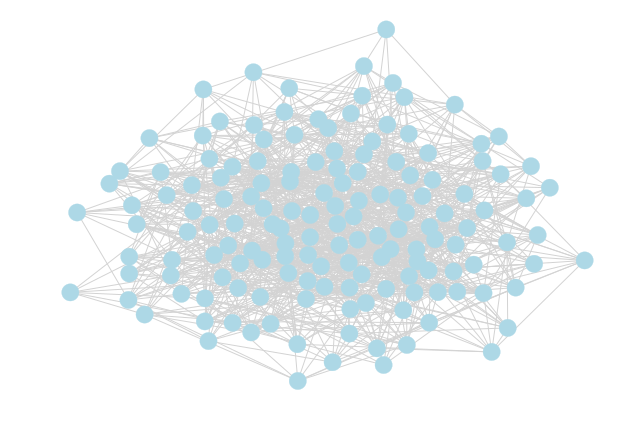

In [4]:
nx.draw(net, edge_color='lightgrey', node_color= 'lightblue')

The network degrees (or edges of each node) are stored in the `net.degree()` method.

In [5]:
net.degree()

DegreeView({0: 8, 1: 13, 2: 21, 3: 17, 4: 15, 5: 20, 6: 10, 7: 16, 8: 19, 9: 20, 10: 16, 11: 11, 12: 13, 13: 11, 14: 15, 15: 12, 16: 16, 17: 10, 18: 10, 19: 16, 20: 15, 21: 20, 22: 21, 23: 17, 24: 12, 25: 17, 26: 18, 27: 14, 28: 9, 29: 11, 30: 16, 31: 17, 32: 8, 33: 20, 34: 17, 35: 14, 36: 16, 37: 14, 38: 15, 39: 14, 40: 8, 41: 17, 42: 13, 43: 15, 44: 22, 45: 10, 46: 16, 47: 5, 48: 8, 49: 15, 50: 12, 51: 16, 52: 15, 53: 14, 54: 15, 55: 7, 56: 11, 57: 14, 58: 23, 59: 13, 60: 18, 61: 22, 62: 21, 63: 14, 64: 12, 65: 10, 66: 27, 67: 16, 68: 13, 69: 16, 70: 19, 71: 11, 72: 18, 73: 16, 74: 16, 75: 12, 76: 13, 77: 18, 78: 16, 79: 17, 80: 24, 81: 12, 82: 14, 83: 15, 84: 13, 85: 11, 86: 18, 87: 13, 88: 12, 89: 17, 90: 11, 91: 16, 92: 17, 93: 17, 94: 16, 95: 9, 96: 16, 97: 10, 98: 11, 99: 16, 100: 16, 101: 23, 102: 13, 103: 16, 104: 15, 105: 17, 106: 14, 107: 16, 108: 13, 109: 12, 110: 10, 111: 19, 112: 20, 113: 13, 114: 9, 115: 11, 116: 15, 117: 13, 118: 18, 119: 13, 120: 17, 121: 14, 122: 17, 

In [6]:
type(net.degree())

networkx.classes.reportviews.DegreeView

We can see that it is a dictionary, so let's extract its values. Now we can plot a histogram of the degree distribution.

In [7]:
x= [] ## list storing degree distribution 

for i in list(net.degree()):
    x.append(i[1])


/Users/manoloflores/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


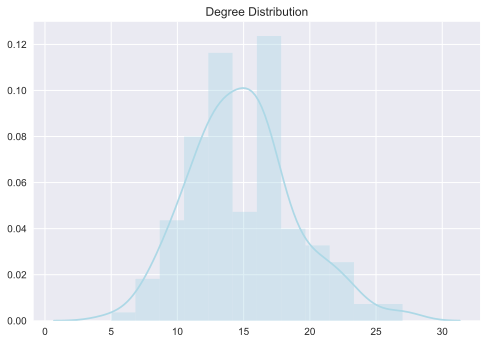

In [8]:
ax = sns.distplot(x,color= 'lightblue')
ax.set_title('Degree Distribution')

We can see that the distribituion $\sim$N ($\mu$ = $np$, $\sigma^2$)

How would you do it using Matplotlib? find out and write the code.

In [9]:
##Write your code here 

### Small world networks: Watts & Strogatz Model. 

In [10]:
##attr correspond to: size, k neighbors, p(random connection)
net = nx.watts_strogatz_graph(500, 4, 0.7) 


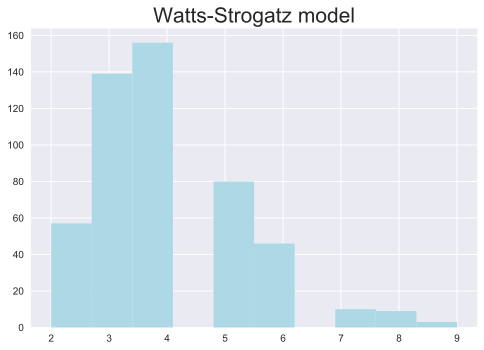

In [11]:
x= [] ## list storing degree distribution 

for i in list(net.degree()):
    x.append(i[1])

plt.hist(x,color= 'lightblue')
plt.title('Watts-Strogatz model', fontsize= 21)

## Analysis on the microfinance network.

Okay, let's start loading the adjacenct matrices corresponding to two villages. 

In [12]:
cd Desktop/

/Users/manoloflores/Desktop


In [13]:
cd Py/

/Users/manoloflores/Desktop/Py


In [14]:
cd NetworkX/

/Users/manoloflores/Desktop/Py/NetworkX


In [15]:
##Upload the adjacency matrixes

A1= np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2= np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

`nx.to_networkx_() method`

In [16]:
## convert the adjacency matrixes into graphs in one step
G1= nx.to_networkx_graph(A1)
G2= nx.to_networkx_graph(A2)

Let's compute the clustering coefficient. 

[0.25,
 0.6666666666666666,
 0.4,
 0.5,
 0.28888888888888886,
 0.23636363636363636,
 1.0,
 1.0,
 1.0,
 1.0,
 0.26666666666666666,
 1.0,
 1.0,
 1.0,
 0.2857142857142857,
 1.0,
 0.4,
 1.0,
 0.09090909090909091,
 0.5,
 1.0,
 1.0,
 0.19047619047619047,
 0.19230769230769232,
 1.0,
 1.0,
 0.14492753623188406,
 0.22631578947368422,
 0.5238095238095238,
 1.0,
 1.0,
 1.0,
 0.3382352941176471,
 0.44761904761904764,
 0.75,
 1.0,
 0.5641025641025641,
 0.6025641025641025,
 0.48717948717948717,
 0.5384615384615384,
 0.5272727272727272,
 0.38461538461538464,
 1.0,
 0.7142857142857143,
 1.0,
 1.0,
 1.0,
 1.0,
 0.19852941176470587,
 0.6388888888888888,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.14545454545454545,
 0.12727272727272726,
 0.14285714285714285,
 0.6,
 1.0,
 0.6,
 1.0,
 1.0,
 0.5238095238095238,
 0.4166666666666667,
 0.37777777777777777,
 0.4166666666666667,
 1.0,
 1.0,
 0.11764705882352941,
 0.0935672514619883,
 0.6,
 1.0,
 1.0,
 1.0,
 0.14285714285714285,
 0.23809523809523808,
 1.0,
 1.0,
 0.2

In [34]:
def net_stats(G):
    
    net_degree_distribution= []

    for i in list(G.degree()):
        net_degree_distribution.append(i[1])
        
    print("Number of nodes in the network: %d" %G.number_of_nodes())
    print("Number of edges in the network: %d" %G.number_of_edges())
    print("Avg node degree: %.2f" %np.mean(list(net_degree_distribution)))
    print('Avg clustering ºcoefficient: %.2f'%nx.cluster.average_clustering(G))
    print('Network density: %.2f'%nx.density(G))

    
    fig, axes = plt.subplots(1,2)

    
   
    axes[0].hist(list(net_degree_distribution), bins=20, color = 'lightblue')
    axes[0].set_xlabel("Degree $k$")
    #axes[0].set_ylabel("$P(k)$")
    
    axes[1].hist(list(nx.clustering(G).values()), bins= 20, color = 'lightgrey')
    axes[1].set_xlabel("Clustering Coefficient $C$")
    #axes[1].set_ylabel("$P(k)$")
    axes[1].set_xlim([0,1])
   
    plt.show()
          

Number of nodes in the network: 843
Number of edges in the network: 3405
Avg node degree: 8.08
Avg clustering ºcoefficient: 0.64
Network density: 0.01


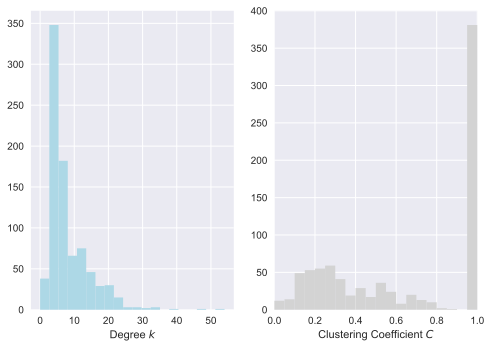

In [35]:
net_stats(G1)

Number of nodes in the network: 877
Number of edges in the network: 3063
Avg node degree: 6.99
Avg clustering ºcoefficient: 0.65
Network density: 0.01


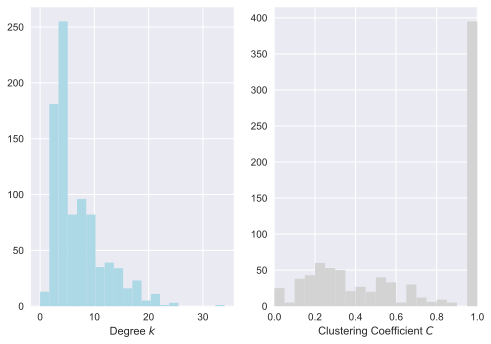

In [36]:
net_stats(G2)

We can see that our networks look like free-scale networks. Therefore there will be hubs in the network.

## Largest Conected Component (LCC)

Q: How large is the largest connected component in our graph? 

The `nx.connected_component_subgraphs()`method is a generator function.

In [21]:
gen= nx.connected_component_subgraphs(G1) 

## calling the actual component by next method

g= gen.__next__()

type(g)


networkx.classes.graph.Graph

We can ask the size of the network using the `len()` function.

In [22]:
len(g)

825

However if we calling the `next()`method, we will be generating the second to largest connected component, and so on.

In [23]:
g = gen.__next__()

In [24]:
len(g)

3

We can extract the more neatly LCC calling the `max()` function. And using the length `len` on the `key` argument.

In [25]:
g1_lcc= max(nx.connected_component_subgraphs(G1), key=len)

g2_lcc= max(nx.connected_component_subgraphs(G2), key=len)

g1_lcc


We can estimate the proportion of the LCC with respect to the original graph.

In [26]:
## proportion of the LCC with its graph
len(g2_lcc)/ len(G2)

0.9236031927023945

In [27]:
len(g1_lcc)/ len(G1)

0.9786476868327402

Just to practice, let's explore the eigenvector centrality in NetworkX. We'll go back to other centrality measures in the following lectures.

In [28]:
ec= nx.eigenvector_centrality(G1)
eigen_centrality = sorted(cc.items(), key= lambda cc: cc[1], reverse= True)[:10]
eigen_centrality

[(54, 0.21212121212121213),
 (119, 0.2),
 (89, 0.19117647058823528),
 (122, 0.1794871794871795),
 (147, 0.17142857142857143),
 (55, 0.16666666666666666),
 (81, 0.16017316017316016),
 (129, 0.15833333333333333),
 (48, 0.15555555555555556),
 (77, 0.15384615384615385)]

We see that we get the same hubs using different metrics. 

/Users/manoloflores/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/manoloflores/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/manoloflores/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/manoloflores/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

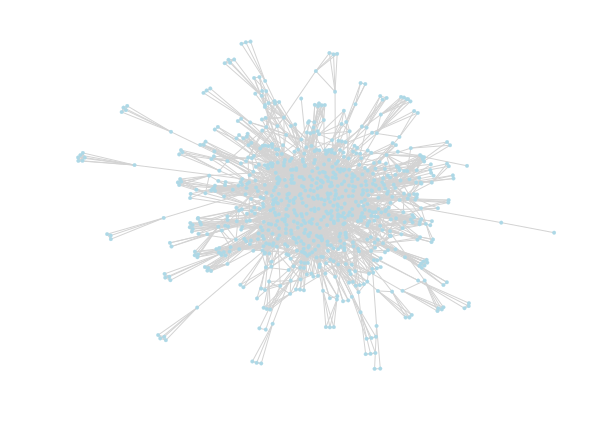

In [29]:
plt.figure()
nx.draw(g1_lcc, edge_color='lightgrey', node_color= 'lightblue', node_size=13)
plt.show()